In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 15)  # Размер картинок

In [2]:
#начальные данные
#y_list = [[-2, 0, 1, 2, -1],]
#x_list = [[-4, -3, -1, 0, 2]]

# пока что только для одномерного случая
#преобразуем в nd.array

X = np.array([ np.linspace(-2, 2.1, 63),])
#y = np.array([-2, -5, 0, 1, 2, -1, -10])
#y =  10*np.sin(X[0])
y = np.array(list(map(lambda x: (x * np.sin(x*30) if x > 0 else np.sin(x*30)) + np.random.normal(0, 0.2) , X[0] )))

In [3]:
#Определяем ядро 
#Parameters: x_i, x_j: nd.array, 
#                      вектора
def kernel(x_i, x_j):
    delta_x = x_i - x_j
    return np.exp(- 80* np.dot(delta_x, delta_x ) )
#    return  np.dot(delta_x, delta_x )  

#ковариационная матрица(kernel) X, Y 
#Parameters: X, Y : nd.array 
#                   x.shape() = (n, 1) , y.shape() = (m, 1)
#Returns: kernel: nd.array
#                 kernel.shape() = (n, m) 
def KERNEL(X, Y):
    
    n, m = (X.shape[1], Y.shape[1])
    COV = np.ones((n, m))
    
    for i in range(n):
        x_i = X[:,i]
        for j in range(m):
            x_j = Y[:,j]
            COV[i,j] = kernel(x_i, x_j)
    
    return COV

In [4]:
#тестовые точки
N = 1000
x_test = np.linspace(-2, 2, N)
X_test = x_test.reshape(1, len(x_test))

In [5]:
#%prun some_useless_slow_function()


#шум
DELTA = 0.3

KXX_inv = np.linalg.inv(KERNEL(X, X) + DELTA ** 2 *  np.eye(len(X)) )

f_mean = KERNEL(X_test, X) @ KXX_inv @ y
f_COV = KERNEL(X_test, X_test) - KERNEL(X_test, X) @ KXX_inv @ KERNEL(X, X_test) + DELTA ** 2 *  np.eye(len(X_test))

#доверительные интервалы
square_root = np.vectorize(np.sqrt)
f_sigma = square_root(f_COV.diagonal())

f_2sigma_up = f_mean + 2 * f_sigma
f_2sigma_down = f_mean - 2 * f_sigma

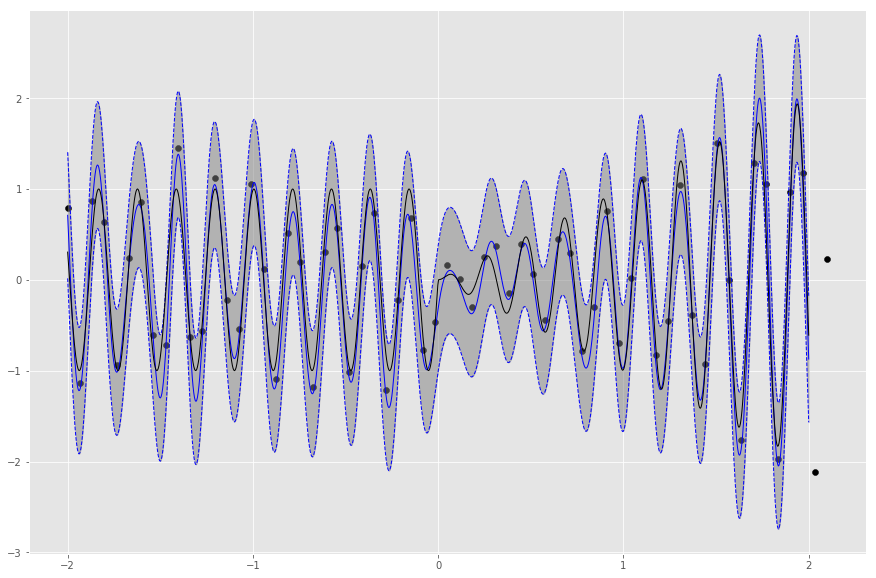

In [6]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.scatter(X[0], y, color = "black" )
plt.plot(x_test, f_mean, linewidth = 1.0, color = "blue" )
plt.plot(x_test, f_2sigma_up, linewidth = 1.0, color = "blue", linestyle = "--" )
plt.plot(x_test, f_2sigma_down, linewidth = 1.0, color = "blue",linestyle = "--")
plt.fill_between(x_test, f_2sigma_up, f_2sigma_down, color = "gray", alpha = 0.5)

#real data
plt.plot(x_test, np.array(list(map(lambda x:  x * np.sin(x*30) if x > 0 else np.sin(x*30) ,x_test ))), linewidth = 1.0, color = "black")
plt.show()